In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

Minimize f(x) = (x - 3)^2

In [2]:
# Optimization
from scipy.optimize import minimize

def f(x):
  return (x-3)**2

# Minimize result, pass in an initial guess as an arg w/ f
result = minimize(f, 2)
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551437397369767e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.325e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

Minimize f(x, y) = (x - 1)^2 + (y - 2.5)^2:

subject to:

x - 2y + 2 ≥ 0

-x - 2y + 6 ≥ 0

-x + 2y + 2 ≥ 0

x ≥ 0 

y ≥ 0

2D function takes in vector x

Constraints must be specified as g(sub-i)(x) ≥ 0

Bounds specified as rectangular

In [3]:
# x[0] = x
# x[1] = y
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
# f([x, y])

# Define constraints
# Tuple of dictionaries
# Type: specifying type
# Ineq: inequality 
# Fun: function
cons = ({'type': 'ineq', 'fun': lambda x: x[0]-2*x[1]+2}, # x - 2y + 2
        {'type': 'ineq', 'fun': lambda x: -x[0]-2*x[1]+6}, # -x - 2y + 6
        {'type': 'ineq', 'fun': lambda x: -x[0]+2*x[1]+2}, # -x - 2y + 2
        )
bounds = ((0, None), (0, None)) # Specifies that x and y go from 0 to infinity

# Specify parameters for result
# (2, 0) = initial guess
# Bounds = bounds
# Constraints = constraints
result = minimize(f, (2, 0), bounds = bounds, constraints = cons)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3

In [4]:
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <

Interpolation

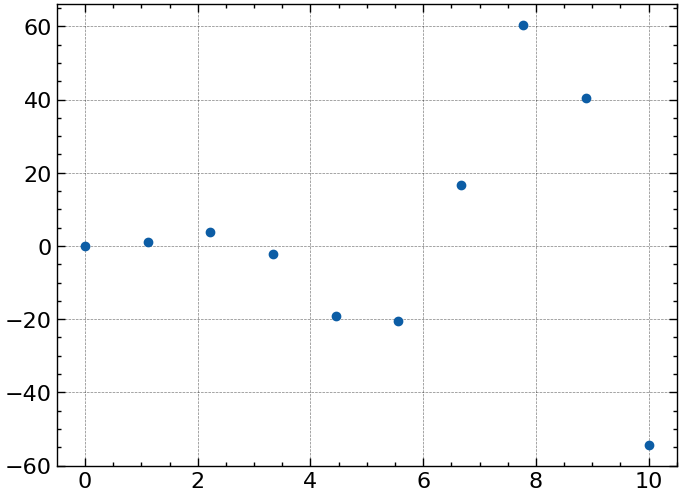

In [6]:
# Data

x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x, y)

In [7]:
# What are the values in between?
from scipy.interpolate import interp1d

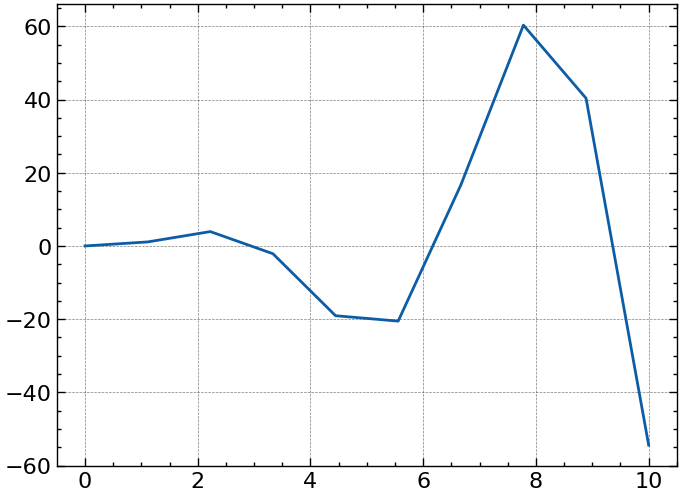

In [8]:
f = interp1d(x, y, kind='linear')
x_dense = np.linspace(0, 10, 100) # From 0 to 10 with 100 points
y_dense = f(x_dense) # y = f(x)
plt.plot(x_dense, y_dense)

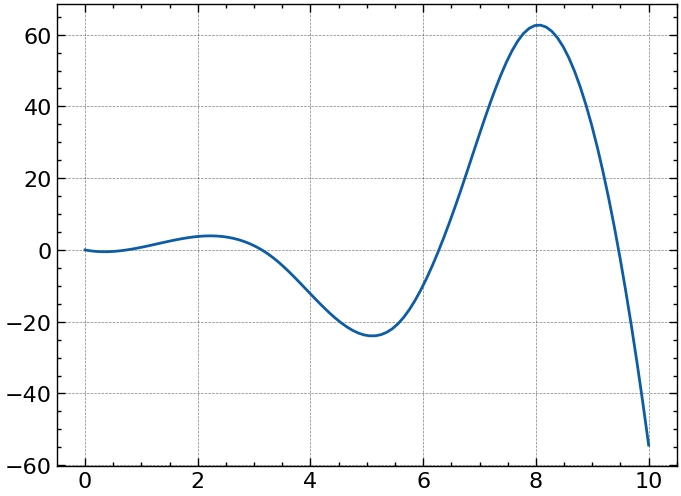

In [9]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100) # From 0 to 10 with 100 points
y_dense = f(x_dense) # y = f(x)
plt.plot(x_dense, y_dense)

Curve Fitting

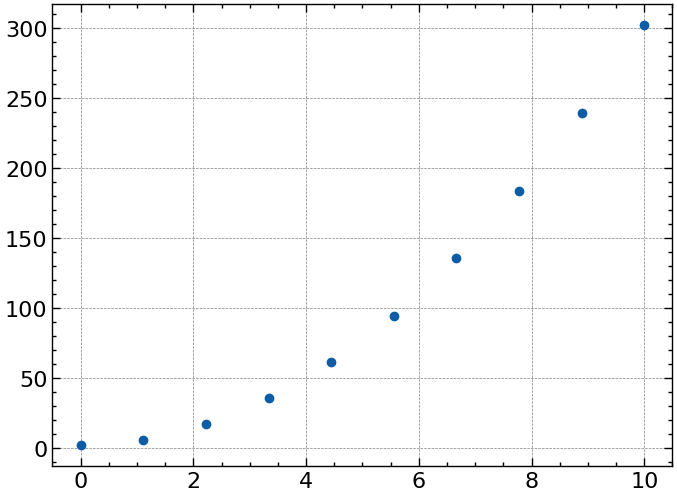

In [10]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2
plt.scatter(x_data, y_data)

In [11]:
# How to fit the data to the curve y = ax^2 + b
# Goal = determine values of a and b

# Import curve_fit function from scipy.optimize module
# Used to fit a curve to a set of data points by estimating the optimal parameters of a function
from scipy.optimize import curve_fit

def func(x, a, b):
  return a*x**2 + b


# popt = optimal values of parameters (a,b) that minimize the difference b/t function/data points
# pcov = esimated covariance matrix of parameter (a,b) estimates. 
# p0=(1,1) = Initial guess for parameters (a,b)
popt, pcov = curve_fit(func, x_data, y_data, p0=(1, 1))

popt

array([3., 2.])

Special Functions

Legendre Polynomials P(sub-l)(x): 

satisfy:

(1-x^2)y" - 2xy' + l(l+1)y = 0

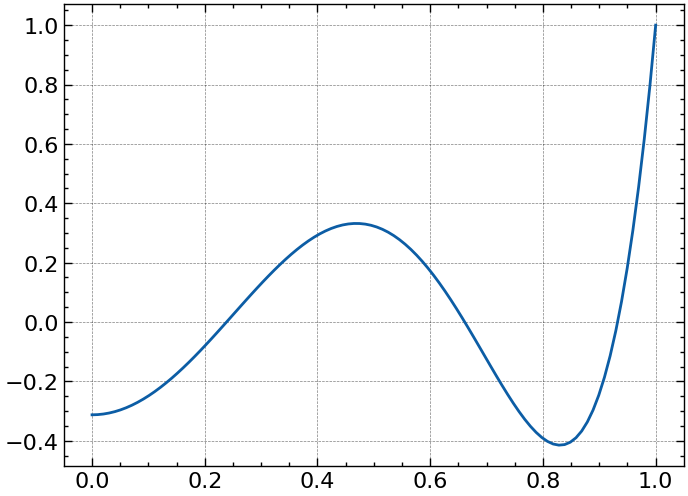

In [25]:
# Angular component of the spherical Schrodinger Equation which permits non-infinite solutions

from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.show()

Bessel Functions J(sub-a)(x):

satisfy:

(x^2)y" + xy' + (x^2 - alpha^2)y = 0

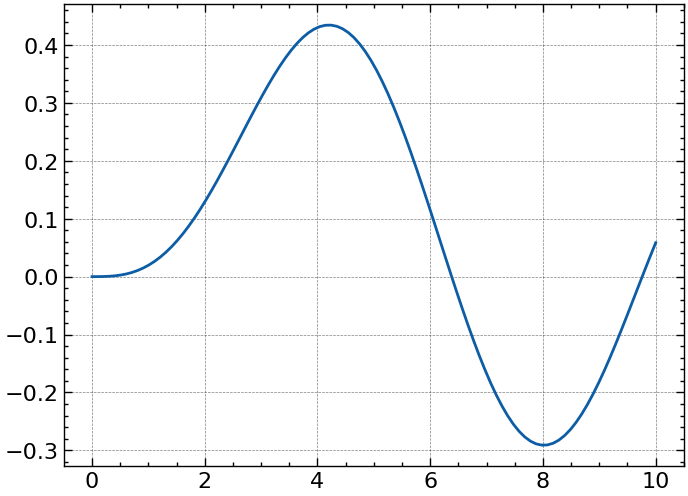

In [26]:
from scipy.special import jv
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3, x))
plt.show()

Calculus

In [28]:
from scipy.misc import derivative

def f(x):
  return x**2 * np.sin(2*x) * np.exp(-x)

x = np.linspace(0, 1, 100)

# Derivative
# Takes the function f, evaluates derivative at all values x, using very tiny dx
derivative(f, x, dx=1e-6)

C:\Windows\Temp\ipykernel_18520\725717996.py:10: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(f, x, dx=1e-6)


array([2.00000000e-12, 6.03920829e-04, 2.38251311e-03, 5.28577629e-03,
       9.26344114e-03, 1.42650411e-02, 2.02399819e-02, 2.71376096e-02,
       3.49072761e-02, 4.34984041e-02, 5.28605490e-02, 6.29434594e-02,
       7.36971364e-02, 8.50718897e-02, 9.70183930e-02, 1.09487737e-01,
       1.22431481e-01, 1.35801703e-01, 1.49551043e-01, 1.63632755e-01,
       1.78000746e-01, 1.92609622e-01, 2.07414723e-01, 2.22372164e-01,
       2.37438874e-01, 2.52572626e-01, 2.67732071e-01, 2.82876773e-01,
       2.97967232e-01, 3.12964916e-01, 3.27832284e-01, 3.42532814e-01,
       3.57031020e-01, 3.71292476e-01, 3.85283835e-01, 3.98972845e-01,
       4.12328366e-01, 4.25320382e-01, 4.37920015e-01, 4.50099539e-01,
       4.61832383e-01, 4.73093145e-01, 4.83857594e-01, 4.94102681e-01,
       5.03806534e-01, 5.12948470e-01, 5.21508990e-01, 5.29469779e-01,
       5.36813708e-01, 5.43524827e-01, 5.49588364e-01, 5.54990719e-01,
       5.59719457e-01, 5.63763301e-01, 5.67112124e-01, 5.69756939e-01,
      

C:\Windows\Temp\ipykernel_18520\157858683.py:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6)) # f'(x)
C:\Windows\Temp\ipykernel_18520\157858683.py:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6, n=2)) # f"(x)


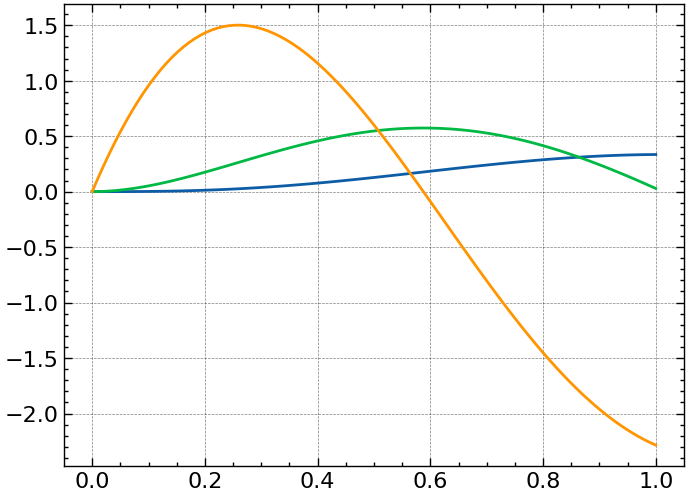

In [19]:
# Plotting

plt.plot(x, f(x)) # f(x)
plt.plot(x, derivative(f, x, dx=1e-6)) # f'(x)
plt.plot(x, derivative(f, x, dx=1e-6, n=2)) # f"(x)

In [20]:
# Single Integrals
from scipy.integrate import quad

integrand = lambda x: x**2 * np.sin(x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

integral

0.10246777930717413

In [21]:
# Double Integrals
from scipy.integrate import dblquad

integrand = lambda x, y: np.sin(x + y**2)
lower_y = lambda x: -x
upper_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lower_y, upper_y)

integral

0.315802507240474

In [22]:
# N# of Integrals
from scipy.integrate import nquad
nquad?

Signature: nquad(func, ranges, args=None, opts=None, full_output=False)
Docstring:
Integration over multiple variables.

Wraps `quad` to enable integration over multiple variables.
Various options allow improved integration of discontinuous functions, as
well as the use of weighted integration, and generally finer control of the
integration process.

Parameters
----------
func : {callable, scipy.LowLevelCallable}
    The function to be integrated. Has arguments of ``x0, ... xn``,
    ``t0, ... tm``, where integration is carried out over ``x0, ... xn``,
    which must be floats.  Where ``t0, ... tm`` are extra arguments
    passed in args.
    Function signature should be ``func(x0, x1, ..., xn, t0, t1, ..., tm)``.
    Integration is carried out in order.  That is, integration over ``x0``
    is the innermost integral, and ``xn`` is the outermost.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

     

First Order Ordinary Diff. Eqs

Air Friction while falling:

v' - (alpha)v^2 + beta = 0

v(0) = 0

In [24]:
# Info about the DiffEq
from scipy.integrate import odeint

def dvdt(v, t):
  return 3*v**2 - 5 # 3 and 5 are arbitrary parameters
v0 = 0

# Solving the DiffEq
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v0, t)

sol.T[0]

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

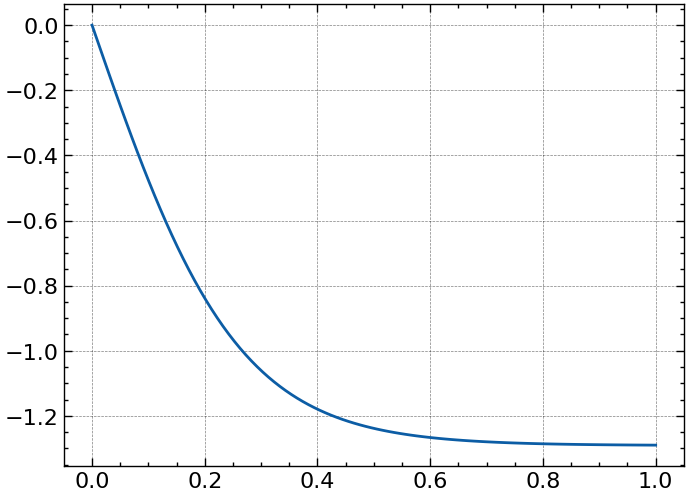

In [29]:
# Plot the solution
plt.plot(t, sol.T[0])

Coupled 1st Order Diff Eqs

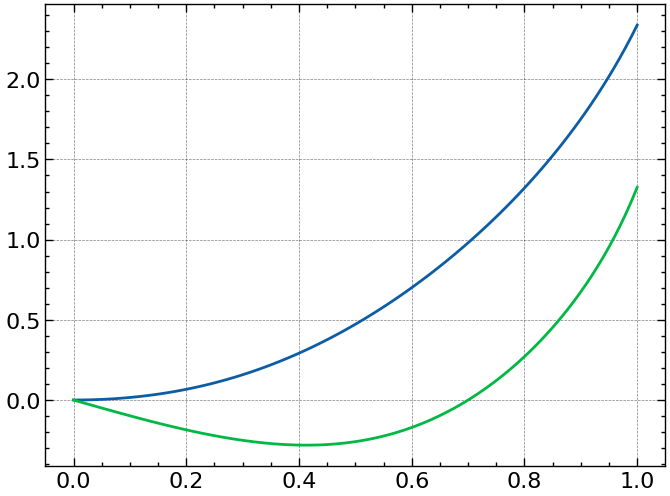

In [31]:
def dSdx(S, x):
  y1, y2 = S
  return [y1 + y2**2 + 3*x,
          3*y1 + y2**3 - np.cos(x)]

y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

y1 = sol.T[0]
y2 = sol.T[1]

plt.plot(x, y1)
plt.plot(x, y2)

Second Order Ordinary Diff Eqs

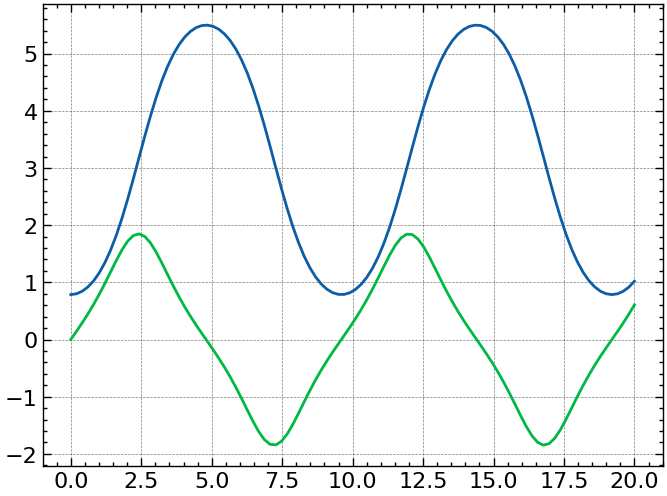

In [33]:
def dSdt(S, t):
  theta, omega = S
  return [omega,
          np.sin(theta)]
theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)

t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

plt.plot(t, theta)
plt.plot(t, omega)

Fourier Transforms

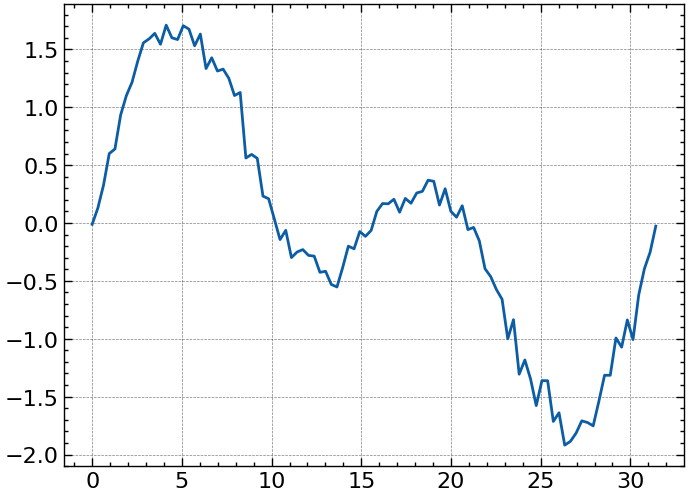

In [34]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))

plt.plot(t, x)

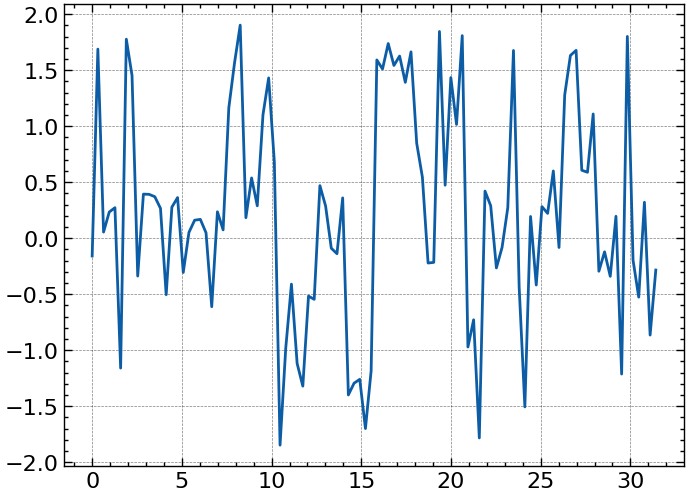

In [35]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))

plt.plot(t, x)

Linear Algebra

In [36]:
# Triangular Matricies

from scipy.linalg import solve_triangular

a = np.array([[3, 0, 0, 0],
              [2, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 1, 1, 1]])

b = np.array([4, 2, 4, 2])

sol = solve_triangular(a, b, lower=True)
sol

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

In [37]:
# Toeplitz Matricies (matricies with constant diagonals)

from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1, 3, 6, 10]) # 1st Column of T
r = np.array([1, -1, -2, -3]) # 1st Row of T
b = np.array([1, 2, 2, 5])

sol = solve_toeplitz((c, r), b)
sol

array([ 1.66666667, -1.        , -2.66666667,  2.33333333])

In [38]:
# Eigenvalue Problems
# Can be solved using Numpy as well

from scipy.linalg import eigh_tridiagonal

d = 3*np.ones(4)
e = -1*np.ones(3)
w, v = eigh_tridiagonal(d, e)

v.T[0] # 1st Eighen vector

array([0.37174803, 0.60150096, 0.60150096, 0.37174803])

In [39]:
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)

A@v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

In [40]:
w[0]*v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])